In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [11]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

%precision 3 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 12.1 단순회귀모형

회귀분석: 인과관계가 의심되는의 변수를 사용해 어느 변수로부터 다른 변수의 값을 예측하는 기법.
- 설명변수(독립변수): 원인
- 반응변수(종속변수): 결과

단순회귀모형: 설명변수와 반응변수가 각각 1개로 가장 단순한 모형.
- x: 쪽지시험 평균점수
- n: 설명변수의 수
- y: 기말고사 점수


In [4]:
path = "/content/12_exam_scores.csv"

df = pd.read_csv(path)
df = df.rename(columns={'final_test': "final_exam", 
                        "sleep_time":"sleeping hours", 
                        "school_method": "transport"})
df.head()

,quiz,final_exam,sleeping hours,transport
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


In [5]:
x = np.array(df['quiz'])        # 독립변수
y = np.array(df['final_exam'])  # 종속변수
n = 1

## 산점도와 회귀직선 그리기
- ```poly_fit```
  - y 데이터에 대한 최적의 fitting(최소제곱)인 n차 다항식 p(x)의 계수를 반환
  - 절편과 계수를 찾아줌
- ```poly1d(poly_fit)```
  - 찾은 절편과 계수로 방정식을 만들어줌


https://m.blog.naver.com/dudnr456/222010163524


In [6]:
poly_fit = np.polyfit(x, y, 1)  
poly_1d = np.poly1d(poly_fit)    
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

In [7]:
print(poly_fit, poly_1d)
print(xs)
print(ys)

[ 6.554 23.699]  
6.554 x + 23.7
[0.    0.18  0.359 0.539 0.718 0.898 1.078 1.257 1.437 1.616 1.796 1.976
 2.155 2.335 2.514 2.694 2.873 3.053 3.233 3.412 3.592 3.771 3.951 4.131
 4.31  4.49  4.669 4.849 5.029 5.208 5.388 5.567 5.747 5.927 6.106 6.286
 6.465 6.645 6.824 7.004 7.184 7.363 7.543 7.722 7.902 8.082 8.261 8.441
 8.62  8.8  ]
[23.699 24.876 26.053 27.23  28.407 29.584 30.761 31.938 33.115 34.292
 35.469 36.646 37.823 39.    40.177 41.354 42.531 43.708 44.885 46.062
 47.239 48.416 49.593 50.77  51.947 53.124 54.301 55.478 56.655 57.832
 59.009 60.186 61.363 62.54  63.717 64.894 66.071 67.248 68.425 69.602
 70.779 71.956 73.133 74.31  75.487 76.664 77.841 79.018 80.195 81.372]


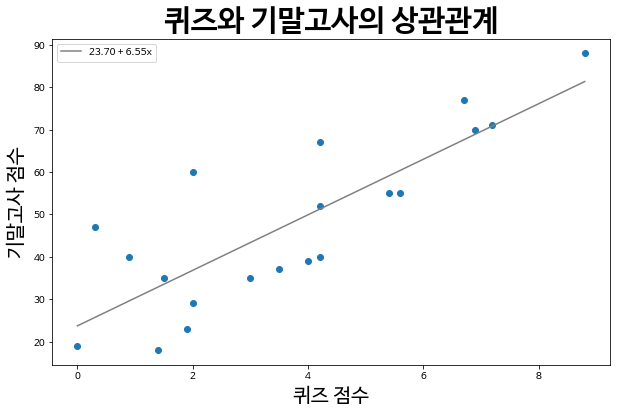

In [17]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('퀴즈 점수', fontsize=20)
ax.set_ylabel("기말고사 점수", fontsize=20)
ax.plot(xs, ys, c='gray',   # x와 y셋으로 선을 그림
        label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
ax.scatter(x,  y)  # x와 y 셋이 좌표를 이뤄 점을 찍음(scatter)
ax.legend()

plt.title('퀴즈와 기말고사의 상관관계', fontsize=30, fontweight='bold')
plt.show()

# 